In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
from glob import glob

In [4]:
import keras
import keras.backend as k

Using TensorFlow backend.


In [5]:
os.listdir()

['.ipynb_checkpoints',
 '.git',
 'data_preprocessing.ipynb',
 'MURA-v1.1.zip',
 '.gitignore',
 'MURA-v1.1']

In [6]:
PATH="MURA-v1.1/"

In [7]:
os.listdir(PATH)

['train_labeled_studies.csv',
 'valid_image_paths.csv',
 'train',
 'valid',
 'valid_labeled_studies.csv',
 'train_image_paths.csv']

In [8]:
train_imgs_path=pd.read_csv(PATH+'train_image_paths.csv')
train_labels=pd.read_csv(PATH+'train_labeled_studies.csv')
test_imgs_path=pd.read_csv(PATH+'valid_image_paths.csv')
test_labels=pd.read_csv(PATH+'valid_labeled_studies.csv')


In [9]:
train_imgs_path.head()

,Img_Path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [10]:
train_imgs_path.shape

(36808, 1)

In [11]:
train_labels.head()

,Img_Path,Label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [12]:
train_labels['Label'].value_counts()

0    8280
1    5177
Name: Label, dtype: int64

In [13]:
test_imgs_path.head()

,Img_Path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [14]:
test_imgs_path.shape

(3197, 1)

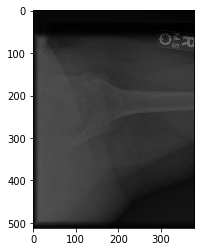

(512, 380, 3)


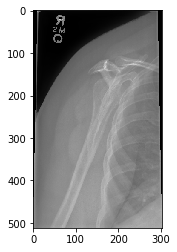

(512, 303, 3)


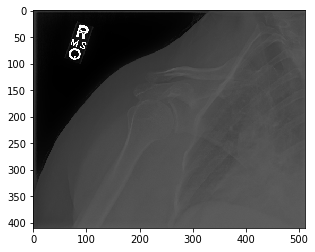

(410, 512, 3)


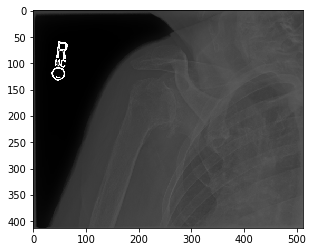

(413, 512, 3)


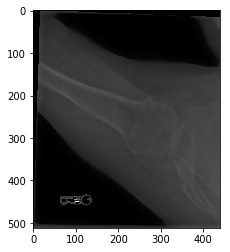

(512, 440, 3)


In [15]:
for path in train_imgs_path.values[:5]:
    img=cv2.imread(path[0])
    plt.imshow(plt.imread(path[0]))
    plt.imshow(img)
    plt.show()
    print (img.shape)

In [16]:
train_labels['Body_Part']=train_labels['Img_Path'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study_Type']=train_labels['Img_Path'].apply(lambda x: str(x.split('/')[4])[:6])
test_labels['Body_Part']=test_labels['Img_Path'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study_Type']=test_labels['Img_Path'].apply(lambda x: str(x.split('/')[4])[:6])

In [17]:
train_labels.head()

,Img_Path,Label,Body_Part,Study_Type
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,SHOULDER,study1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,SHOULDER,study1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1,SHOULDER,study1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1,SHOULDER,study1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1,SHOULDER,study1


In [18]:
test_labels.head()

,Img_Path,Label,Body_Part,Study_Type
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,WRIST,study1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,WRIST,study1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1,WRIST,study2
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1,WRIST,study3
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1,WRIST,study1


In [19]:
import seaborn as sns

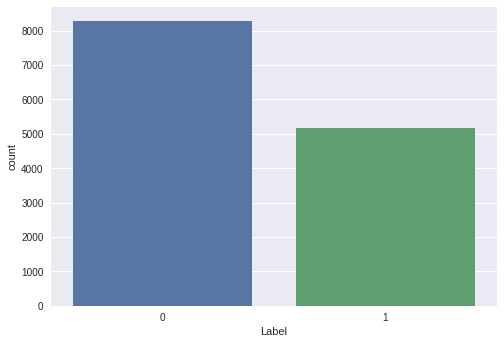

In [20]:
sns.countplot(train_labels['Label'])

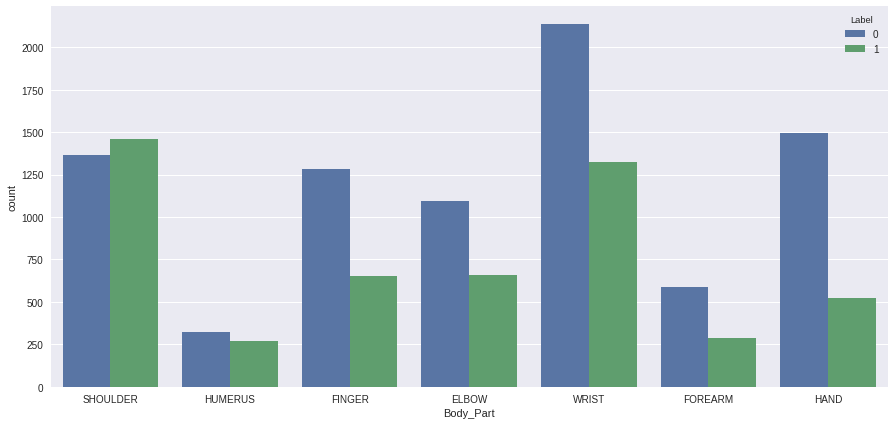

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_labels,x='Body_Part',hue='Label')

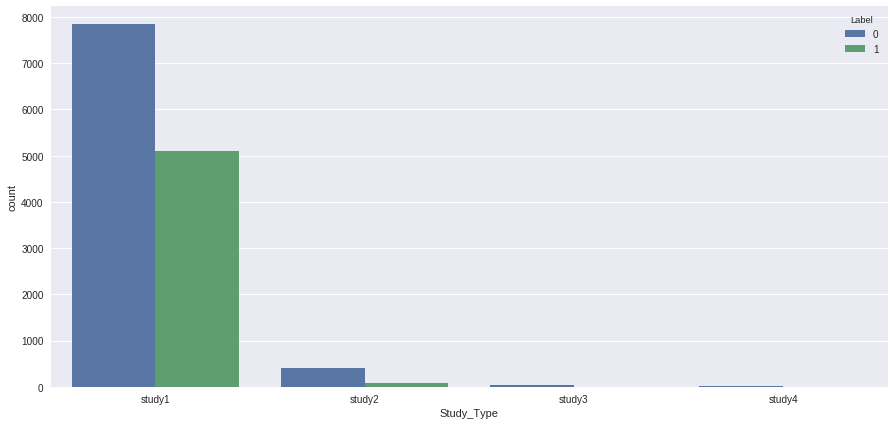

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(data=train_labels,x='Study_Type',hue='Label')

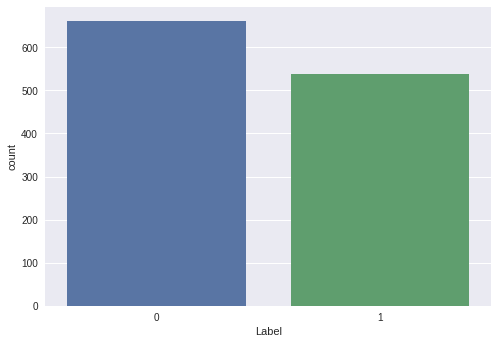

In [23]:
sns.countplot(test_labels['Label'])

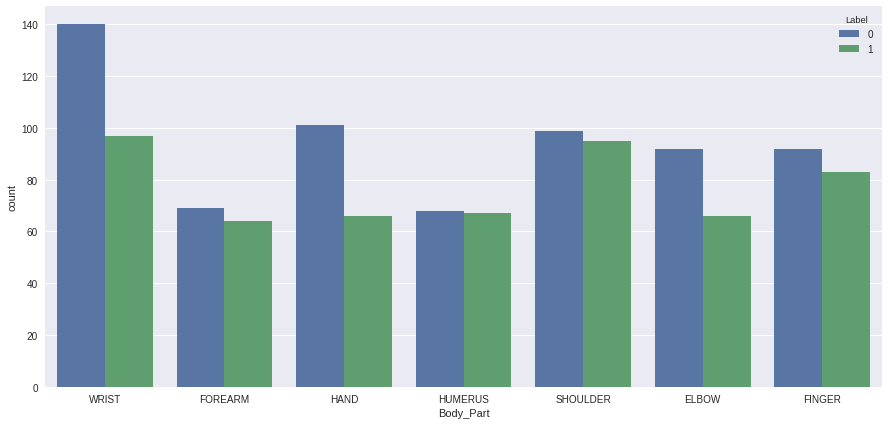

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(data=test_labels,x='Body_Part',hue='Label')

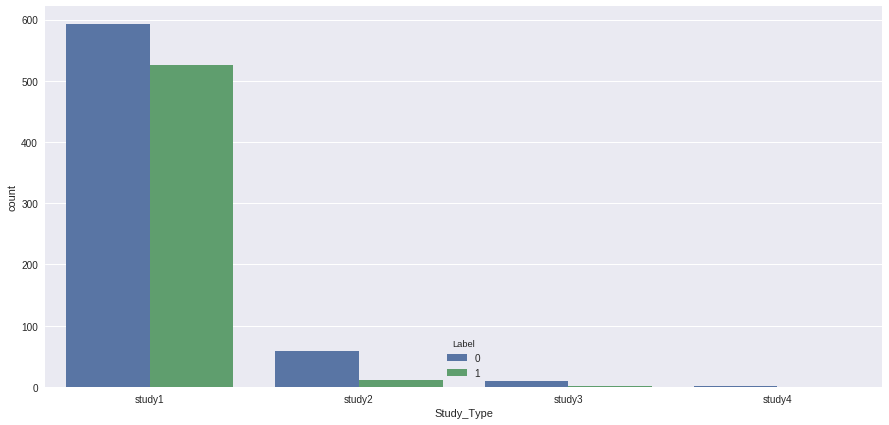

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(data=test_labels,x='Study_Type',hue='Label')

In [26]:
from tqdm import tqdm
from PIL import Image

In [27]:
def read_image(Path):
    img=cv2.imread(Path)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(224,224))
    #print (img.shape)
    img=np.array(img)
    #img=np.resize(img,(224,224))
    #print (img.shape)
    img=img/255.
    return img

In [28]:
X_train=[]
X_val=[]

In [29]:
import torch

In [30]:
torch.cuda.is_available()

False

In [29]:
train_labels['Img_Path']=train_imgs_path['Img_Path']
test_labels['Img_Path']=test_imgs_path['Img_Path']

In [30]:
train_df=train_labels.groupby(['Label']).apply(lambda x: x.sample(5000,replace=True))

In [31]:
train_df.shape

(10000, 4)

In [32]:
train_labels.shape

(13457, 4)

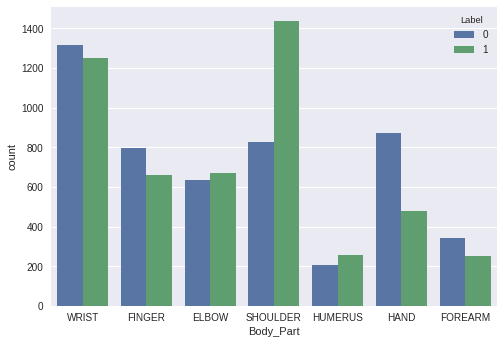

In [33]:
sns.countplot(data=train_df,x='Body_Part',hue='Label')

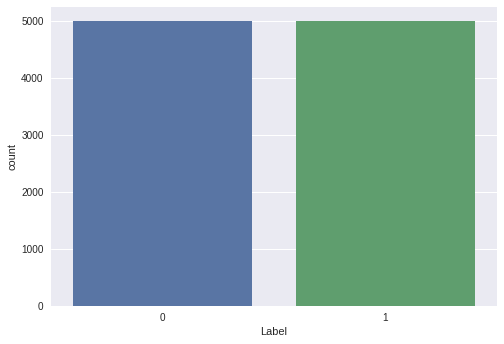

In [34]:
sns.countplot(train_df['Label'])

In [35]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions

In [36]:
IMG_SIZE=(224,224)

In [37]:
datagen=ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

In [38]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [39]:
train_gen = flow_from_dataframe(datagen, train_df, 
                             path_col = 'Img_Path',
                            y_col = 'Label', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 64)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 10000 images


In [40]:
valid_gen = flow_from_dataframe(datagen, test_labels, 
                             path_col = 'Img_Path',
                            y_col = 'Label', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 64)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1199 images


In [41]:
test_X, test_Y = next(flow_from_dataframe(datagen, 
                               test_labels, 
                             path_col = 'Img_Path',
                            y_col = 'Label', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 64)) # one big batch
# used a fixed dataset for final evaluation
final_test_X, final_test_Y = next(flow_from_dataframe(datagen, 
                            test_labels, 
                            path_col = 'Img_Path',
                            y_col = 'Label',
                            target_size = IMG_SIZE,
                            color_mode = 'rgb',
                            batch_size = 64)) # one big batch


## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1199 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1199 images


In [42]:
t_x,t_y=next(train_gen)

In [43]:
t_x.shape,t_y.shape

((64, 224, 224, 3), (64,))

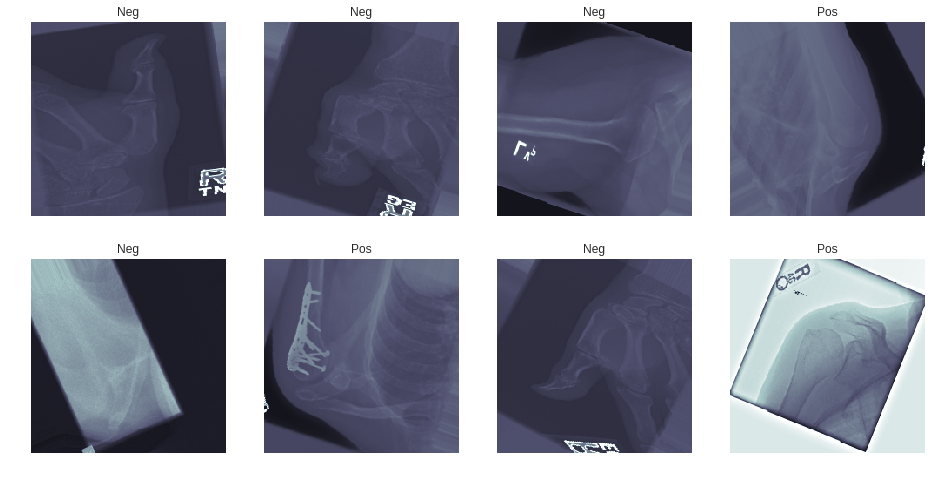

In [44]:
fig, m_axs = plt.subplots(2, 4, figsize = (16, 8))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -127, vmax = 127)
    c_ax.set_title('%s' % ('Pos' if c_y>0.5 else 'Neg'))
    c_ax.axis('off')

In [46]:
from keras.layers import  Convolution2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.models import  Sequential

In [48]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = t_x.shape[1:]))
#if you resize the image above, change the input shape
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 64)        0         
__________

In [49]:
model.fit_generator(train_gen, 
                      validation_data = (test_X, test_Y), 
                      epochs = 30, 
                      callbacks = callbacks_list,
                      workers = 3)

NameError: name 'callbacks_list' is not defined

In [47]:
base_model=VGG16(input_shape=t_x.shape[1:],include_top=False,weights='imagenet')
base_model.trainable=False

In [48]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [49]:
from keras.layers import *
from keras.models import *

In [50]:
pt_features = Input(base_model.get_output_shape_at(0)[1:], name = 'feature_input')
pt_depth = base_model.get_output_shape_at(0)[-1]

In [51]:
pt_features


<tf.Tensor 'feature_input:0' shape=(?, 7, 7, 512) dtype=float32>

In [52]:
pt_depth

512

In [53]:
bn_features = BatchNormalization()(pt_features)
# here we do an attention mechanism to turn pixels in the GAP on an off
attn_layer = Conv2D(128, kernel_size = (1,1), padding = 'same', activation = 'elu')(bn_features)
attn_layer = Conv2D(32, kernel_size = (1,1), padding = 'same', activation = 'elu')(attn_layer)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'elu')(attn_layer)
attn_layer = AvgPool2D((2,2), strides = (1,1), padding = 'same')(attn_layer) # smooth results
attn_layer = Conv2D(1, 
                    kernel_size = (1,1), 
                    padding = 'valid', 
                    activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.5)(Dense(128, activation = 'elu')(gap_dr))
out_layer = Dense(1, activation = 'sigmoid')(dr_steps)

attn_model = Model(inputs = [pt_features], outputs = [out_layer], name = 'attention_model')

attn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])

attn_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
feature_input (InputLayer)      (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 7, 7, 512)    2048        feature_input[0][0]              
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 7, 7, 128)    65664       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 7, 7, 32)     4128        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [50]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('cardio_attn')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=10) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [51]:
from keras.optimizers import Adam

In [56]:
model = Sequential(name = 'combined_model')
model.add(base_model)
model.add(attn_model)
model.compile(optimizer = Adam(lr = 1e-3), loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
attention_model (Model)      (None, 1)                 138690    
Total params: 14,853,378
Trainable params: 137,154
Non-trainable params: 14,716,224
_________________________________________________________________


In [ ]:
train_gen.batch_size = 64
model.fit_generator(train_gen, 
                      validation_data = (test_X, test_Y), 
                      epochs = 30, 
                      callbacks = callbacks_list,
                      workers = 3)

Epoch 1/30
157/157 [==============================] - 2627s 17s/step - loss: 7.9570 - acc: 0.5009 - val_loss: 9.2167 - val_acc: 0.4219

Epoch 00001: val_loss improved from inf to 9.21669, saving model to cardio_attn_weights.best.hdf5
Epoch 2/30
157/157 [==============================] - 2397s 15s/step - loss: 7.9807 - acc: 0.4994 - val_loss: 9.2167 - val_acc: 0.4219

Epoch 00002: val_loss did not improve from 9.21669
Epoch 3/30
157/157 [==============================] - 2390s 15s/step - loss: 7.9665 - acc: 0.5003 - val_loss: 9.2167 - val_acc: 0.4219

Epoch 00003: val_loss did not improve from 9.21669
Epoch 4/30
156/157 [============================>.] - ETA: 15s - loss: 7.9616 - acc: 0.5006